##Steps included for Your (cellphone_test.csv) dataset notebook

1. Load the dataset
2. Check for missing values
3. Handle missing data
4. Perform EDA (visualizations, statistical insights)
5. Feature engineering (creating new features, encoding categorical variables, etc.)

###Step 1. Install Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Step 2. Load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/Datasets/CellPhone_test.csv")

In [4]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


###Step 3. Check Dataset Info

In [6]:
# Check for missing values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [23]:
df.drop(columns=['id'], inplace=True)

In [24]:
df.shape

(1000, 20)

In [25]:
# Get numerical statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


###Step 4. Handle missing data

In [26]:
# Check for missing values
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


###Step 4.1. Handle duplicate data

In [27]:
df[df.duplicated]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


In [28]:
#If there're duplicated data, perform this step
df.drop_duplicates(inplace=True, keep="first")
df.shape #The output shape will be the same as before as there're any duplicated data

(1000, 20)

###Step 4.2. If there's null value, perfomring these steps to fill the missing data

In [10]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


###Step 5. Data Visualization

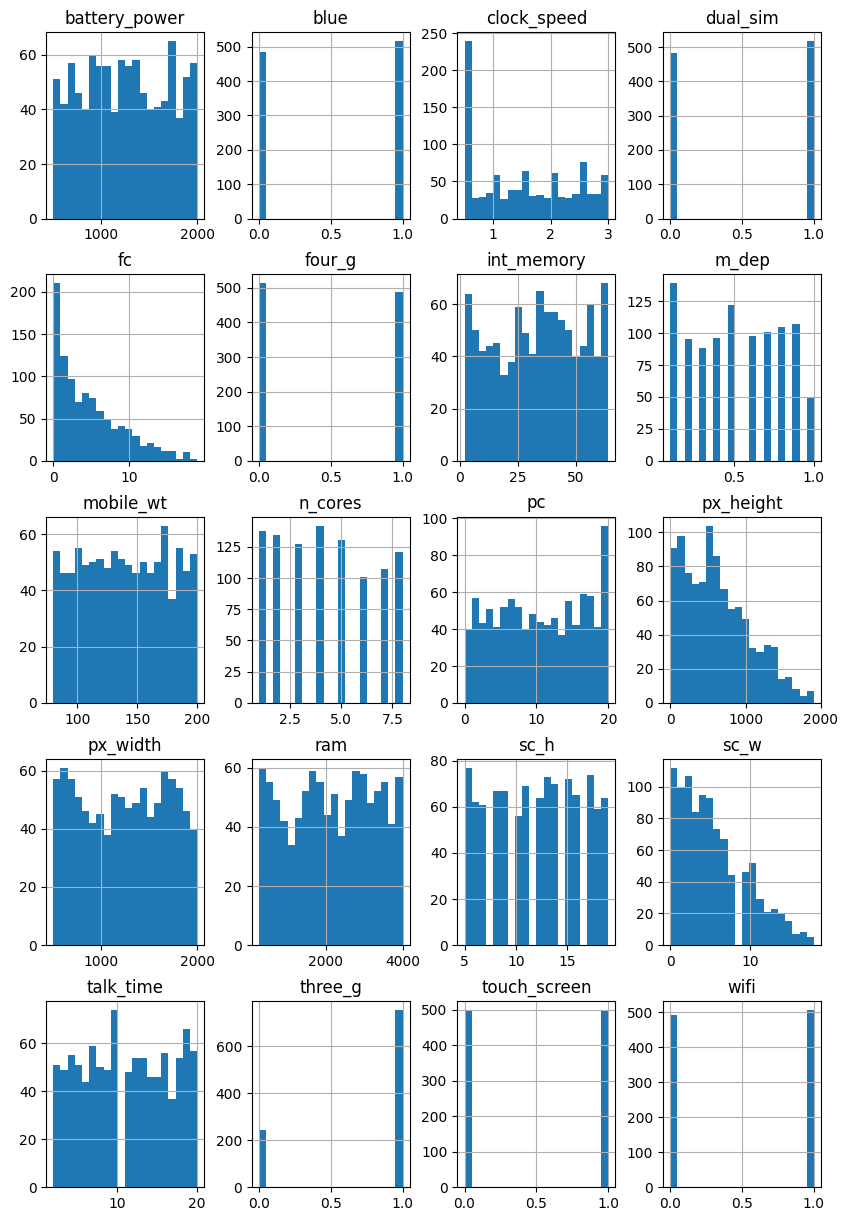

In [29]:
# Plot distribution of numerical features
df.hist(figsize=(10, 15), bins=20)
plt.show()

###Step 5.1. Detecting Outliers

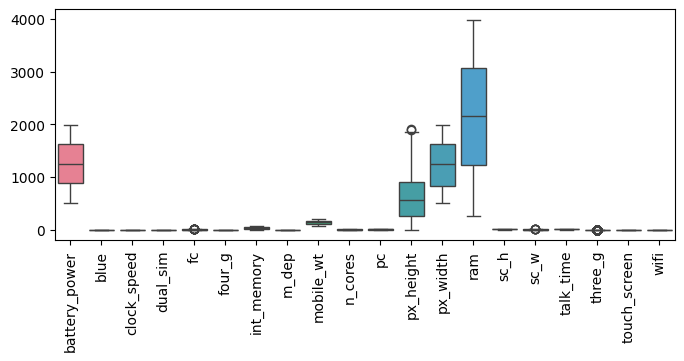

In [32]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 3))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

###Step 5.2. Finding out correlation

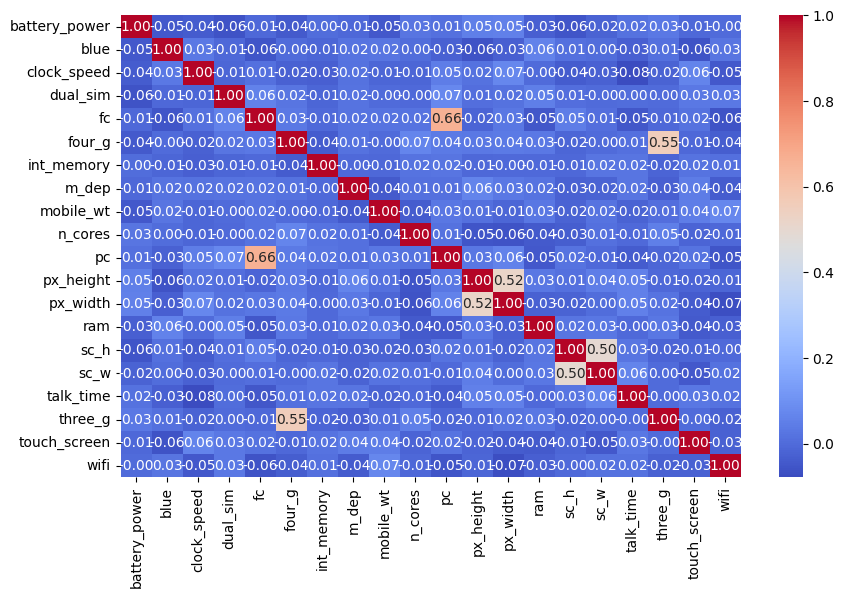

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

###Step 6. Data Preprocessing


####Step 6.1. Drop Unnecessary Columns

In [34]:
columns_to_drop = ['fc', 'talk_time', 'sc_w']
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Remaining columns: {df_cleaned.columns}")

Remaining columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'three_g', 'touch_screen', 'wifi'],
      dtype='object')


####Step 6.2. Apply Log Transformation for Highly Skewed Features

In [36]:
import numpy as np

In [37]:
# Log transformation for pixel height & width
df_cleaned['px_height'] = np.log1p(df_cleaned['px_height'])  # log1p handles log(0)
df_cleaned['px_width'] = np.log1p(df_cleaned['px_width'])

####Step 6.3. Cap Outliers (Winsorization) for ram

In [38]:
# Apply Winsorization (capping) at 5th and 95th percentiles
lower_limit = df_cleaned['ram'].quantile(0.05)
upper_limit = df_cleaned['ram'].quantile(0.95)

df_cleaned['ram'] = np.clip(df_cleaned['ram'], lower_limit, upper_limit)

####Step 6.4. Scale Numerical Features

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

# Select numerical columns for scaling
numerical_cols = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'px_height', 'px_width', 'ram']
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

df_cleaned.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,three_g,touch_screen,wifi
0,0.362241,1,0.52,1,0,0.048387,0.000000,193,3,16,0.718174,0.748928,0.894817,12,0,1,0
1,0.227485,1,0.00,1,1,0.951613,0.777778,191,5,12,0.875858,0.387902,1.000000,6,1,0,0
2,0.871915,1,0.92,0,0,0.403226,0.888889,186,3,4,0.946219,0.724976,0.579442,17,0,1,1
3,0.697799,0,0.00,1,1,0.370968,0.444444,96,8,20,0.753310,0.904966,1.000000,10,1,1,0
4,0.623082,0,0.36,0,1,0.758065,0.444444,108,6,18,0.876389,0.347132,0.397518,15,1,0,1


In [45]:
df.ram

,ram
0,3476
1,3895
2,2396
3,3893
4,1773
...,...
995,2121
996,1933
997,1223
998,2509


####Step 6.5. Encode Binary Categorical Features

In [42]:
# Convert binary categorical features to integers (0/1)
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df_cleaned[binary_cols] = df_cleaned[binary_cols].astype(int)

###Step 7. Categorize ram into Classes

In [49]:
df_cleaned['ram_category'] = pd.cut(
    df_cleaned['ram'],
    bins=[0, 0.33, 0.66, 1],  # Divide 0-1 range into 3 equal parts
    labels=[0, 1, 2],
    include_lowest=True
)

In [50]:
df_cleaned['ram_category'].value_counts()

,count
ram_category,
2,371
0,330
1,299


###Step 8. Define Features & Target

X contains only input features, and y contains the RAM category labels.



In [52]:
# Drop the original RAM column (since we already categorized it)
X = df_cleaned.drop(columns=['ram_category'])  # Features
y = df_cleaned['ram_category']  # Target variable

###Step 9. Split Data for ML Training

In [53]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (800, 17), Testing set size: (200, 17)


###Step 9.1. Train a Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Predictions
y_pred = model.predict(X_test)

In [56]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<ipython-input-58-7f6e07d1c012>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


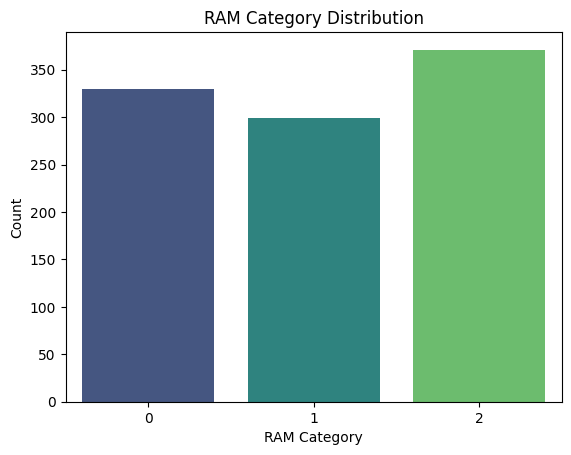

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x=y, palette='viridis')
plt.title("RAM Category Distribution")
plt.xlabel("RAM Category")
plt.ylabel("Count")
plt.show()

###Step 9.2. Fixing overfitting issue

In [59]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

In [61]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [62]:
y_pred = model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

1.0

In [64]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 1.0


In [65]:
import pandas as pd

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

,0
ram,0.774812
px_width,0.031233
px_height,0.026758
int_memory,0.024564
battery_power,0.022737
mobile_wt,0.020220
sc_h,0.017234
pc,0.016875
clock_speed,0.015963
m_dep,0.015380


In [66]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.785


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 1.0


In [68]:
# Drop 'ram' from features
X = X.drop(columns=['ram'])

# Split the new dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Updated training set size:", X_train.shape)
print("Updated test set size:", X_test.shape)

Updated training set size: (800, 16)
Updated test set size: (200, 16)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model again without RAM
model = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.295

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.24      0.28        71
           1       0.30      0.15      0.20        61
           2       0.28      0.49      0.35        68

    accuracy                           0.29       200
   macro avg       0.30      0.29      0.28       200
weighted avg       0.31      0.29      0.28       200



In [70]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)  # Increased iterations
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.375


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.339
